In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = 'data big data.csv'
# Membaca data dari file CSV dengan delimiter titik koma
data = pd.read_csv(file_path, sep=';')

# Tampilkan beberapa baris pertama dari data
data.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1013400000,2002-02-11 04:00:00 +0000 UTC,28800,Denpasar,-8.652.497,115.219.117,31.0,31.0,31.0,1009.1,70,1.5,250,20,801,Clouds,few clouds,02d
1,1013403600,2002-02-11 05:00:00 +0000 UTC,28800,Denpasar,-8.652.497,115.219.117,32.0,32.0,32.0,1008.1,70,2.1,360,20,801,Clouds,few clouds,02d
2,1013407200,2002-02-11 06:00:00 +0000 UTC,28800,Denpasar,-8.652.497,115.219.117,30.6,30.6,30.6,1008.1,72,4.1,110,20,801,Clouds,few clouds,02d
3,1013410800,2002-02-11 07:00:00 +0000 UTC,28800,Denpasar,-8.652.497,115.219.117,28.0,28.0,28.0,1008.1,88,5.7,60,75,803,Clouds,broken clouds,04d
4,1013414400,2002-02-11 08:00:00 +0000 UTC,28800,Denpasar,-8.652.497,115.219.117,29.0,29.0,29.0,1008.1,83,3.1,100,20,801,Clouds,few clouds,02d


In [3]:
# 1. Menangani Missing Values dan Nilai yang Tidak Sesuai
# Memeriksa missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
dt                     0
dt_iso                 0
timezone               0
city_name              0
lat                    0
lon                    0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64


In [4]:
# Menghapus karakter atau spasi yang tidak diperlukan pada kolom city_name dan weather_description
data['city_name'] = data['city_name'].str.strip()
data['weather_description'] = data['weather_description'].str.strip()



In [5]:
# 3. Menghapus Duplikasi Data
# Memeriksa duplikasi
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Menghapus duplikasi
data.drop_duplicates(inplace=True)

Number of duplicate rows: 19


In [6]:
data.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1013400000,2002-02-11 04:00:00 +0000 UTC,28800,Denpasar,-8.652.497,115.219.117,31.0,31.0,31.0,1009.1,70,1.5,250,20,801,Clouds,few clouds,02d
1,1013403600,2002-02-11 05:00:00 +0000 UTC,28800,Denpasar,-8.652.497,115.219.117,32.0,32.0,32.0,1008.1,70,2.1,360,20,801,Clouds,few clouds,02d
2,1013407200,2002-02-11 06:00:00 +0000 UTC,28800,Denpasar,-8.652.497,115.219.117,30.6,30.6,30.6,1008.1,72,4.1,110,20,801,Clouds,few clouds,02d
3,1013410800,2002-02-11 07:00:00 +0000 UTC,28800,Denpasar,-8.652.497,115.219.117,28.0,28.0,28.0,1008.1,88,5.7,60,75,803,Clouds,broken clouds,04d
4,1013414400,2002-02-11 08:00:00 +0000 UTC,28800,Denpasar,-8.652.497,115.219.117,29.0,29.0,29.0,1008.1,83,3.1,100,20,801,Clouds,few clouds,02d


                 dt  timezone           temp       temp_min       temp_max  \
count  1.583460e+05  158346.0  158346.000000  158346.000000  158346.000000   
mean   1.296000e+09   28800.0      27.387943      27.178196      27.595633   
std    1.629707e+08       0.0       1.945954       1.971613       1.974242   
min    1.013400e+09   28800.0      11.630000       2.000000      18.700000   
25%    1.155050e+09   28800.0      26.000000      25.900000      26.000000   
50%    1.295800e+09   28800.0      27.200000      27.000000      27.500000   
75%    1.437188e+09   28800.0      28.830000      28.600000      29.000000   
max    1.578438e+09   28800.0      39.000000      39.000000      39.800000   

            pressure       humidity     wind_speed       wind_deg  \
count  158346.000000  158346.000000  158346.000000  158346.000000   
mean     1009.908298      80.570378       3.653381     156.271153   
std         2.318697       8.671576       1.959407      88.759656   
min      1000.000000 

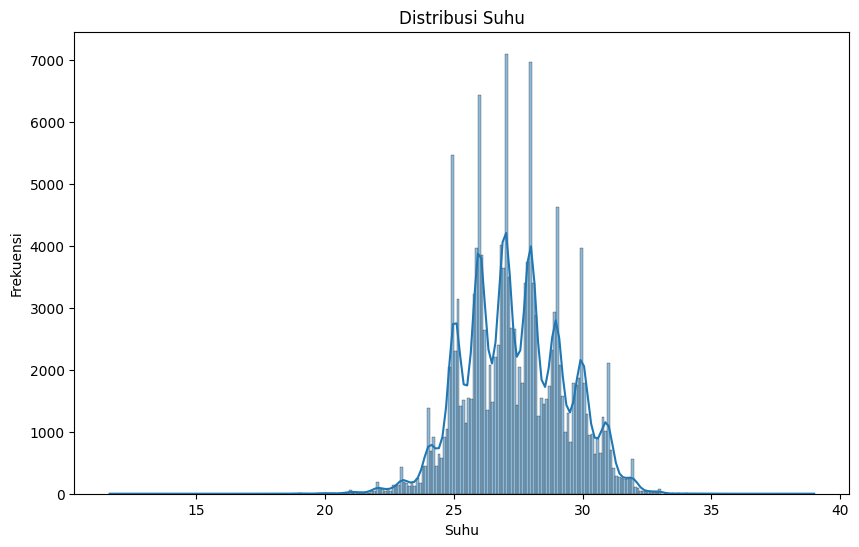

In [7]:
# Statistik deskriptif
print(data.describe())

# Visualisasi distribusi suhu
plt.figure(figsize=(10, 6))
sns.histplot(data['temp'], kde=True)
plt.title('Distribusi Suhu')
plt.xlabel('Suhu')
plt.ylabel('Frekuensi')
plt.show()

In [8]:
data['dt'] = pd.to_datetime(data['dt'], unit='s', errors='coerce')

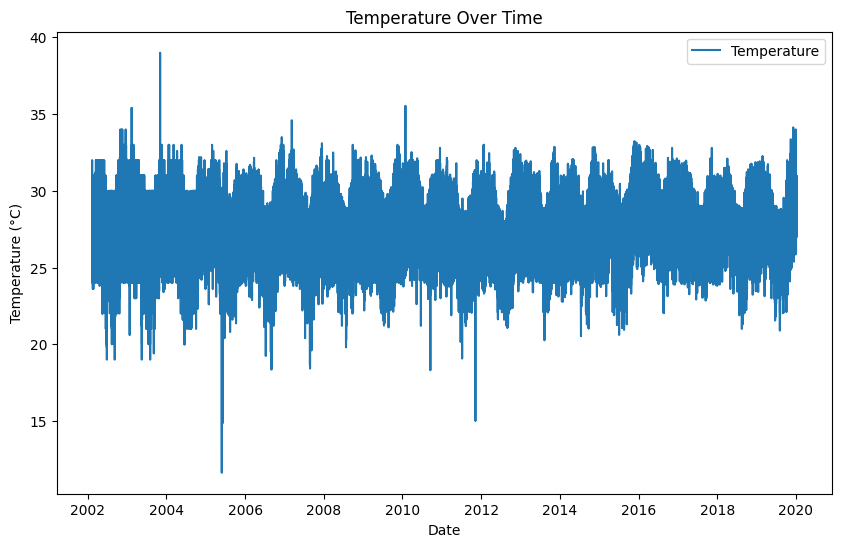

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(data['dt'], data['temp'], label='Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.show()
#Visualisasi Suhu Seiring Waktu

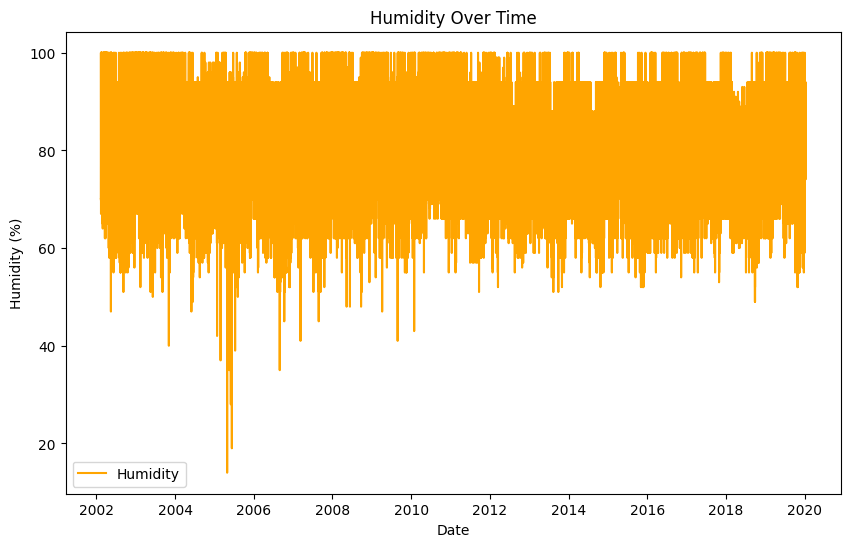

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(data['dt'], data['humidity'], label='Humidity', color='orange')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.title('Humidity Over Time')
plt.legend()
plt.show()
#Visualisasi Kelembapan Seiring Waktu

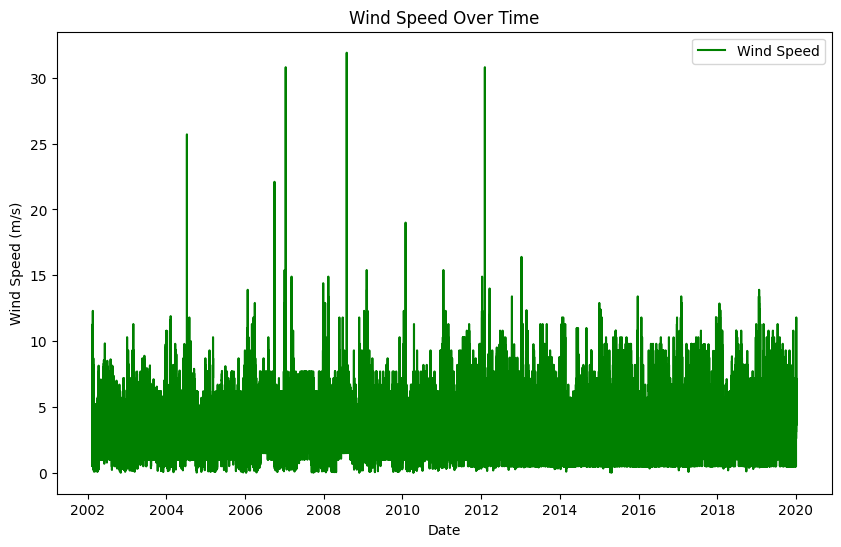

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(data['dt'], data['wind_speed'], label='Wind Speed', color='green')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed Over Time')
plt.legend()
plt.show()
#Visualisasi Kecepatan Angin Seiring Waktu

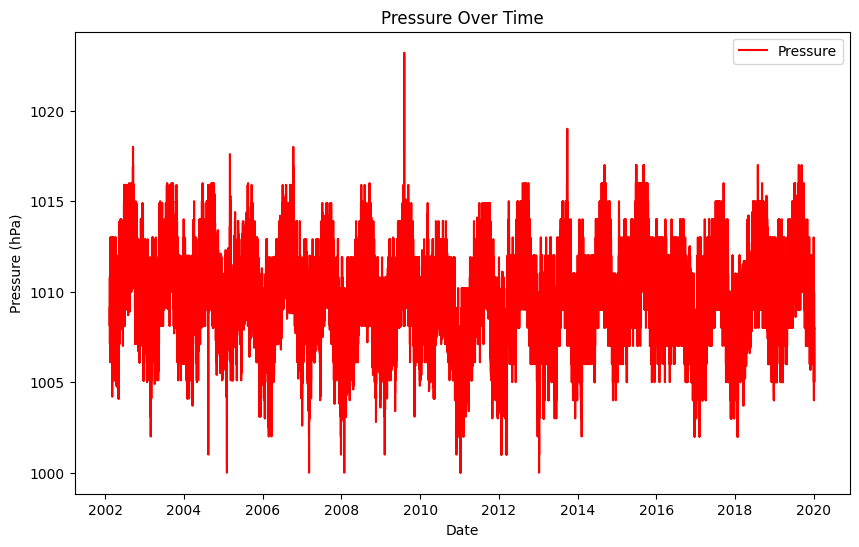

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(data['dt'], data['pressure'], label='Pressure', color='red')
plt.xlabel('Date')
plt.ylabel('Pressure (hPa)')
plt.title('Pressure Over Time')
plt.legend()
plt.show()
#Visualisasi Tekanan Udara Seiring Waktu

In [13]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [14]:
# Menghitung rata-rata suhu
mean_temperature = np.mean(data['temp'])

# Menghitung standar deviasi suhu
std_dev_temperature = np.std(data['temp'], ddof=1)

# Menghitung korelasi Pearson antara suhu dan kelembapan
correlation_temp_humidity = data['temp'].corr(data['humidity'])

print(f"Mean Temperature: {mean_temperature}")
print(f"Standard Deviation of Temperature: {std_dev_temperature}")
print(f"Pearson Correlation between Temperature and Humidity: {correlation_temp_humidity}")

Mean Temperature: 27.38794311191947
Standard Deviation of Temperature: 1.945953713983894
Pearson Correlation between Temperature and Humidity: -0.6771518108129124
